# Multivariate Linear Regresssion


    y = b0 + b1 * x1 + b2 * x2 + b3 * x3

# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from mpl_toolkits import mplot3d

# Import csv

In [2]:
df=pd.read_csv('data/Salary_multiple.csv')

In [3]:
df.head()

,YearsExperience,Field,Salary
0,1.1,Technical,39343.0
1,1.3,Non-Technical,26205.0
2,1.5,Technical,37731.0
3,2.0,Non-Technical,28525.0
4,2.2,Technical,39891.0


# Simple Encoding

In [4]:
df.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)

C:\Users\PC\AppData\Local\Temp\ipykernel_9144\2156117559.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.loc[:,'Field'].replace(['Technical','Non-Technical'],[0,1],inplace=True)
C:\Users\PC\AppData\Local\Temp\ipykernel_9144\2156117559.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.loc

In [5]:
print(df.head())

   YearsExperience  Field   Salary
0              1.1      0  39343.0
1              1.3      1  26205.0
2              1.5      0  37731.0
3              2.0      1  28525.0
4              2.2      0  39891.0


# Splitting x and y

In [6]:
#split x and y
x=df.iloc[:,:-1].values
print(x)
y=df.iloc[:,2].values
print(y)

[[ 1.1  0. ]
 [ 1.3  1. ]
 [ 1.5  0. ]
 [ 2.   1. ]
 [ 2.2  0. ]
 [ 2.9  1. ]
 [ 3.   0. ]
 [ 3.2  1. ]
 [ 3.2  0. ]
 [ 3.7  0. ]
 [ 3.9  1. ]
 [ 4.   0. ]
 [ 4.   0. ]
 [ 4.1  0. ]
 [ 4.5  1. ]
 [ 4.9  1. ]
 [ 5.1  1. ]
 [ 5.3  0. ]
 [ 5.9  0. ]
 [ 6.   1. ]
 [ 6.8  1. ]
 [ 7.1  0. ]
 [ 7.9  0. ]
 [ 8.2  1. ]
 [ 8.7  0. ]
 [ 9.   1. ]
 [ 9.5  1. ]
 [ 9.6  0. ]
 [10.3  1. ]
 [10.5  0. ]]
[ 39343.  26205.  37731.  28525.  39891.  36642.  60150.  34445.  64445.
  57189.  43218.  55794.  56957.  57081.  41111.  47938.  56029.  83088.
  81363.  53940.  61738.  98273. 101302.  73812. 109431.  75582.  76969.
 112635.  82391. 121872.]


In [7]:
x=x.reshape(-1,2)
y=y.reshape(-1,1)

# Plot Data

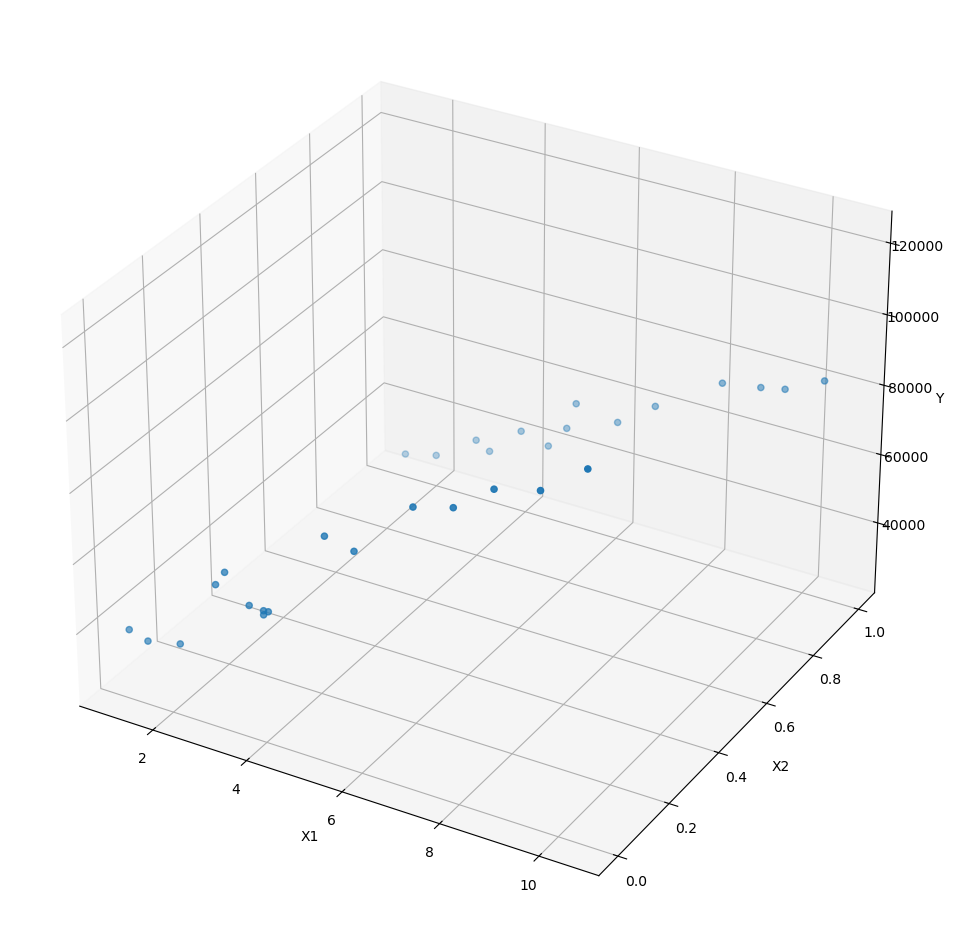

In [8]:
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')

ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

sequence_containing_x_vals = x[:,0]
sequence_containing_y_vals = x[:,1]
sequence_containing_z_vals = y

ax.scatter(sequence_containing_x_vals, sequence_containing_y_vals, sequence_containing_z_vals)
plt.show()

# Assignments

<li> Train </li>
<li> Evaluate Model </li>
<li> Plot the regression line and points </li>

In [9]:
#Split dataset into train and test data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.2, random_state=42)


print(x_train.shape)
print(x_test.shape)


(24, 2)
(6, 2)


In [10]:
#train the model 
regressor = LinearRegression()

model = regressor.fit(x_train, y_train)
print(model.coef_)
print(model.intercept_)

[[  8075.85132257 -23227.86091263]]
[31219.74338714]


In [11]:
#predict on testm data
y_pred = model.predict(x_test)
print(y_pred)
print('*************')
print(y_test)

[[108747.91608383]
 [ 47563.55395511]
 [ 74213.8633196 ]
 [ 74021.75539677]
 [ 57062.46761937]
 [ 61100.39328066]]
*************
[[112635.]
 [ 47938.]
 [ 73812.]
 [ 83088.]
 [ 64445.]
 [ 57189.]]


In [12]:
#Evaluate
from sklearn.metrics import r2_score

r_squared = r2_score(y_test, y_pred)
print("The R2 error is :", r_squared)

The R2 error is : 0.9362115441624429


In [17]:
#Predict Custom value
custom_value = np.array([[4, 1]])
print(model.predict(custom_value))

[[40295.2877648]]


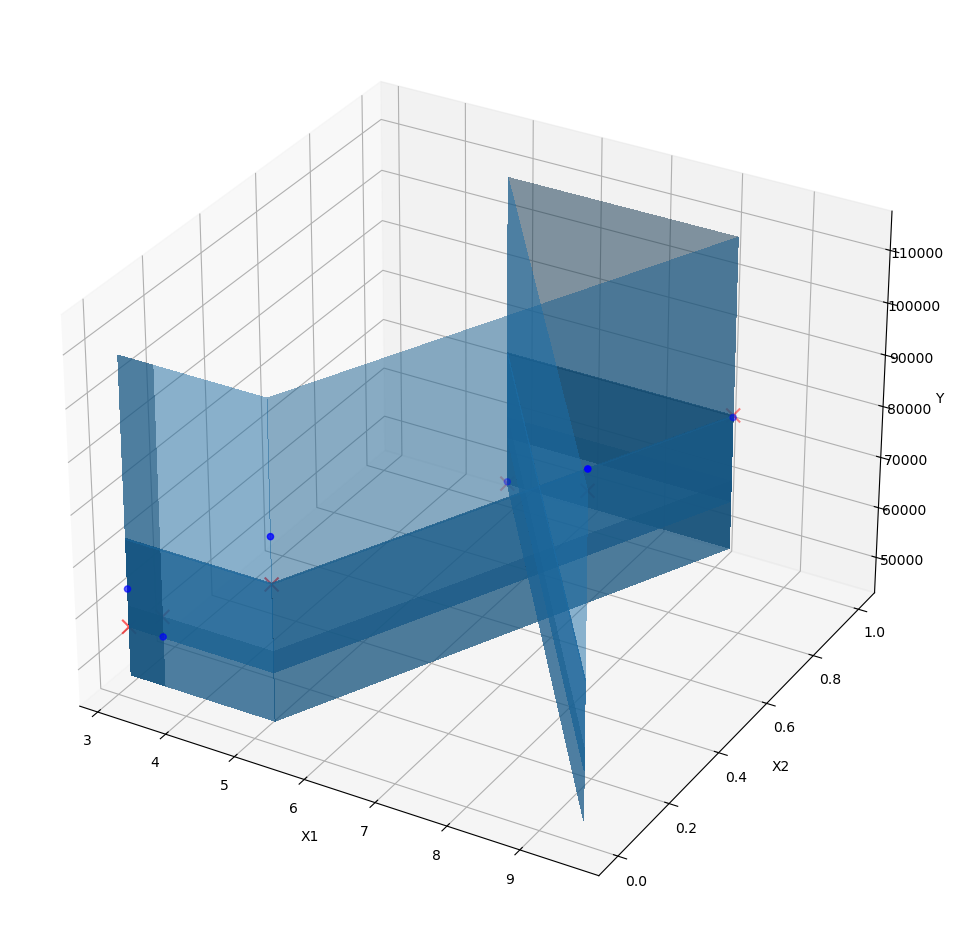

In [14]:
#Plotting
fig = plt.figure(figsize=(12, 12))
ax = fig.add_subplot(projection='3d')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')

#  Plot the actual test data points
ax.scatter(x_test[:, 0], x_test[:, 1], y_test, color='blue', label='Actual Test Points')

# Plot the predicted data points
ax.scatter(x_test[:, 0], x_test[:, 1], y_pred, color='red', label='Predicted Points', marker='x', s=100)

ax.plot_surface(x_test[:,0], x_test[:, 1], y_pred,  linewidth=0, antialiased=False, alpha=0.5)


plt.show()

# Export the model as a pkl file

In [15]:
import joblib

joblib.dump(model, 'salary_multiple_model.pkl')

['salary_multiple_model.pkl']